In [14]:
# Import our dependencies
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from datetime import date

In [3]:
# DATAFRAMES
#Engagement Data
# "data/most_emailed_comments.csv"
# "data/most_viewed_comments.csv"
# "data/most_shared_comments.csv"
# 'data/all_engaged_comments.csv'

# Engagement Analysis

In [64]:
#Load files
period = 30
date = '041320' # '041320'
most_emailed_df = pd.read_csv(f'data/most_emailed_comments.csv',index_col ='asset_id')
most_viewed_df = pd.read_csv(f'data/most_viewed_comments.csv',index_col ='asset_id')
most_shared_df = pd.read_csv(f'data/most_shared_comments.csv',index_col ='asset_id')

most_emailed_df = most_emailed_df[['title','adx_keywords','published_date','url','first_keyword','about_covid19','Total Comments_x']]
most_emailed_df.rename(columns = {'Total Comments_x':'total_comments'}, inplace = True)
most_viewed_df = most_viewed_df[['title','adx_keywords','published_date','url','first_keyword','about_covid19','Total Comments']]
most_viewed_df.rename({'Total Comments':'total_comments'}, inplace = True)
most_shared_df = most_shared_df[['title','adx_keywords','published_date','url','first_keyword','about_covid19','Total Comments']]
most_shared_df.rename({'Total Comments':'total_comments'}, inplace = True)


most_shared_df.head()

,title,adx_keywords,published_date,url,first_keyword,about_covid19,Total Comments
asset_id,,,,,,,
100000001662729,The Ecology of Disease,West Nile Virus;Nipah Virus;Livestock Diseases...,2012-07-14,https://www.nytimes.com/2012/07/15/sunday-revi...,False,False,114
100000007029870,"He Has 17,700 Bottles of Hand Sanitizer and No...","Coronavirus (2019-nCoV);Prices (Fares, Fees an...",2020-03-14,https://www.nytimes.com/2020/03/14/technology/...,True,True,4408
100000007041499,Younger Adults Make Up Big Portion of Coronavi...,Coronavirus (2019-nCoV);your-feed-healthcare;E...,2020-03-18,https://www.nytimes.com/2020/03/18/health/coro...,True,True,0
100000007041449,Coronavirus Ravages 7 Members of a Single Fami...,Coronavirus (2019-nCoV);Quarantines;Deaths (Fa...,2020-03-18,https://www.nytimes.com/2020/03/18/nyregion/ne...,True,True,596
100000007043943,Is Our Fight Against Coronavirus Worse Than th...,Quarantines;Coronavirus (2019-nCoV);Shutdowns ...,2020-03-20,https://www.nytimes.com/2020/03/20/opinion/cor...,False,True,0


In [40]:
no_true_emailed = most_emailed_df['about_covid19'].value_counts()[True]
no_false_emailed = most_emailed_df['about_covid19'].value_counts()[False]

no_true_viewed = most_viewed_df['about_covid19'].value_counts()[True]
no_false_viewed = most_viewed_df['about_covid19'].value_counts()[False]

no_true_shared = most_shared_df['about_covid19'].value_counts()[True]
no_false_shared = most_shared_df['about_covid19'].value_counts()[False]

no_true = np.average([no_true_emailed,no_true_viewed,no_true_shared])
no_false = np.average([no_false_emailed,no_false_viewed,no_false_shared])

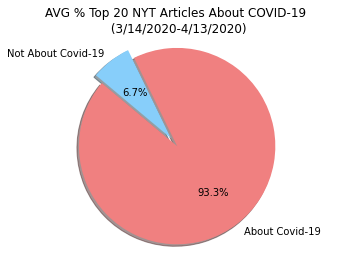

In [41]:
# Labels for the sections of our pie chart
labels = ["About Covid-19","Not About Covid-19"]

# The values of each section of the pie chart
sizes = [no_true,no_false]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("AVG % Top 20 NYT Articles About COVID-19 \n (3/14/2020-4/13/2020)")
# Save an image of our chart and print the final product to the screen
output_file = "images/top_20_engaged_aboutcovid19_pie.png"
plt.savefig(output_file, metadatadict={"Created By":"Erendiz Tarakci"})
plt.show()

In [52]:
# most_emailed_covid19_df = most_emailed_df[most_emailed_df['about_covid19'] == True]
# most_viewed_covid19_df = most_viewed_df[most_viewed_df['about_covid19'] == True]
# most_shared_covid19_df = most_shared_df[most_shared_df['about_covid19'] == True]

no_true_covid19_emailed = most_emailed_df['first_keyword'].value_counts()[True]
no_false_covid19_emailed = most_emailed_df['first_keyword'].value_counts()[False]

no_true_covid19_viewed = most_viewed_df['first_keyword'].value_counts()[True]
no_false_covid19_viewed = most_viewed_df['first_keyword'].value_counts()[False]

no_true_covid19_shared = most_shared_df['first_keyword'].value_counts()[True]
no_false_covid19_shared = most_shared_df['first_keyword'].value_counts()[False]

no_true_covid19 = np.average([no_true_covid19_emailed,no_true_covid19_viewed,no_true_covid19_shared])
no_false_covid19 = np.average([no_false_covid19_emailed,no_false_covid19_viewed,no_false_covid19_shared])

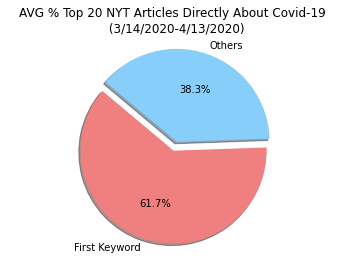

In [54]:
# Labels for the sections of our pie chart
labels = ["First Keyword","Others"]

# The values of each section of the pie chart
sizes = [no_true_covid19,no_false_covid19]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("AVG % Top 20 NYT Articles Directly About Covid-19 \n (3/14/2020-4/13/2020)")
# Save an image of our chart and print the final product to the screen
output_file = "images/top_20_engaged_first_key_covid19_pie.png"
plt.savefig(output_file, metadatadict={"Created By":"Erendiz Tarakci"})
plt.show()

In [20]:
# #Load files
# period = 30
# date = '041320' # '041320'
# most_emailed_pub_df = pd.read_csv(f'data/most_emailed_pubcount_{period}_{date}.csv',index_col='Published Date')
# most_viewed_pub_df = pd.read_csv(f'data/most_viewed_pubcount_{period}_{date}.csv',index_col='Published Date')
# most_shared_pub_df = pd.read_csv(f'data/most_shared_pubcount_{period}_{date}.csv',index_col='Published Date')

# most_engaged_pub_df = pd.concat([most_emailed_pub_df, most_viewed_pub_df,
#                                  most_shared_pub_df]).groupby('Published Date').sum().reset_index()
# most_engaged_pub_df.head()

,Published Date,Number Articles
0,2012-07-14,1
1,2020-03-12,1
2,2020-03-13,1
3,2020-03-14,2
4,2020-03-15,2


In [156]:
# Create the X and Y axis lists
comments_df = pd.read_csv('data/all_engaged_comments.csv',index_col='asset_id')
us_cv_comments_df = pd.read_csv('data/us_cv.csv')

In [157]:
datey = us_cv_comments_df['Date']
ndatey = []
for item in datey:
    x = dt.datetime.utcfromtimestamp(item).strftime('%m/%d/%Y %H:%M:%S')
    y = x.split()
    ndatey.append(y[0])
us_cv_comments_df['Date'] = ndatey
us_cv_comments_df['Date']=pd.to_datetime (us_cv_comments_df['Date'])
us_cv_comments_df.set_index('Date', inplace=True)
us_cv_comments_df.tail()

,Unnamed: 0,New Cases,New Deaths,Total Cases,Total Deaths
Date,,,,,
2020-04-10,10434,33901,1873,466033,16690
2020-04-11,10435,35527,2087,501560,18777
2020-04-12,10436,28391,1831,529951,20608
2020-04-13,10437,27620,1500,557571,22108
2020-04-14,10438,25023,1541,582594,23649


In [158]:
comments_df.rename(columns={'published_date':'Date'},inplace=True)
comments_df.set_index('Date', inplace=True)

In [162]:
comments_cases_df = pd.merge(comments_df,us_cv_comments_df,how='left',left_index=True,right_index=True)
comments_cases_df = comments_cases_df[['total_comments','New Cases','New Deaths','Total Cases','Total Deaths']]
comments_cases_df.sort_values(by="Date",ascending = True, inplace=True)
comments_cases_df.to_csv('data/comments_cases_us.csv')
comments_cases_df.head()

,total_comments,New Cases,New Deaths,Total Cases,Total Deaths
Date,,,,,
2020-03-14,4408,511,7,2174,47
2020-03-15,1892,777,10,2951,57
2020-03-15,2447,777,10,2951,57
2020-03-17,0,887,16,4661,85
2020-03-18,0,1766,23,6427,108


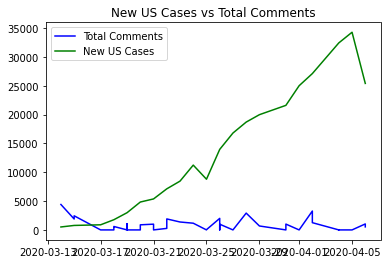

In [169]:
# Plot the world average as a line chart
comments, = plt.plot(comments_cases_df.index, comments_cases_df['total_comments'], color="blue", label="Total Comments" )

# Plot the unemployment values for a single country
cases_us, = plt.plot(comments_cases_df.index, comments_cases_df['New Cases'], 
                        color="green",label='New US Cases')

# Create a legend for our chart
plt.legend(handles=[comments, cases_us], loc="best")
plt.title('New US Cases vs Total Comments')
output_file = "images/new_us_cases_vs_tota_comments.png"
plt.savefig(output_file, metadatadict={"Created By":"Erendiz Tarakci"})
# Show the chart
plt.show()

# Stock Market, Cases, VIX

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import time
import datetime as dt
import calendar
import seaborn as sn

# Import CSV data files
full_data = "data/full_data.csv"
vix_data = "data/vixcurrent.csv"

nasdaq_data = "data/data-APZBu.csv"
dowj_data = "data/data-EKHTG.csv"
sandp_data = "data/data-ULLTa.csv"
company_data = "data/stock2.csv"

# Read data files
full_data = pd.read_csv(full_data)
vix_data = pd.read_csv(vix_data)

nasdaq_data = pd.read_csv(nasdaq_data)
dowj_data = pd.read_csv(dowj_data)
sandp_data = pd.read_csv(sandp_data)
company_data = pd.read_csv(company_data)


world_cv_df = full_data.loc[full_data['location'] == 'World']
us_cv_df = full_data.loc[full_data['location'] == 'United States']
vix_data
company_data

,date,AAPL,AAL,AMZN,IBM,PFE,ANTM,WMT
0,2020-04-15,284.43,12.290,2307.68,118.69,35.97,250.47,128.76
1,2020-04-14,287.05,11.945,2283.32,123.91,36.44,252.01,129.00
2,2020-04-13,273.25,11.560,2168.87,121.15,35.14,240.53,125.30
3,2020-04-09,267.99,12.510,2042.76,121.50,35.39,242.46,121.80
4,2020-04-08,266.07,11.330,2043.00,119.29,34.60,247.02,121.84
...,...,...,...,...,...,...,...,...
3657,2005-10-03,54.44,21.500,46.01,80.45,25.29,75.83,43.76
3658,2005-09-30,53.61,21.010,45.30,80.22,24.97,75.82,43.82
3659,2005-09-29,52.34,20.210,44.79,80.36,25.09,75.31,43.54
3660,2005-09-28,51.08,20.500,43.37,79.50,24.86,74.69,43.13


In [53]:
vix_date = vix_data['Date']

nvix_date = []
for item in vix_date:
    nv_date = time.mktime(dt.datetime.strptime(item, "%m/%d/%Y").timetuple())
    nvix_date.append(nv_date)
    
vix_data['Date'] = nvix_date
vix_data.columns = ['Date', 'VIX Open', 'VIX High', 'VIX Low', 'VIX Close']

In [54]:
world_date = world_cv_df['date']
nworld_date = []
for item in world_date:
    nw_date = time.mktime(dt.datetime.strptime(item, "%Y-%m-%d").timetuple())
    nworld_date.append(nw_date)

world_cv_df['date'] = nworld_date
world_cv_df.drop(columns='location', inplace=True)
world_cv_df.columns = ['Date', 'New Cases', 'New Deaths', 'Total Cases', 'Total Deaths']

/Users/joemiller/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/joemiller/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [55]:
us_date = us_cv_df['date']
nus_date = []
for item in us_date:
    nu_date = time.mktime(dt.datetime.strptime(item, "%Y-%m-%d").timetuple())
    nus_date.append(nus_date)
us_cv_df['date'] = nworld_date
us_cv_df.drop(columns='location', inplace=True)
us_cv_df.columns = ['Date', 'New Cases', 'New Deaths', 'Total Cases', 'Total Deaths']
#us_cv_df.to_csv('data/us_cv.csv')

/Users/joemiller/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
merged_df = pd.merge(world_cv_df, vix_data, on='Date', left_index=True)

# merged_df.info()
# merged_df.set_index('Date')
datey = merged_df['Date']
ndatey = []
for item in datey:
    x = dt.datetime.utcfromtimestamp(item).strftime('%m/%d/%Y %H:%M:%S')
    y = x.split()
    ndatey.append(y[0])
merged_df['Date'] = ndatey
merged_df['Date']=pd.to_datetime (merged_df['Date'])
merged_df.set_index('Date', inplace=True)
merged_df

,New Cases,New Deaths,Total Cases,Total Deaths,VIX Open,VIX High,VIX Low,VIX Close
Date,,,,,,,,
2019-12-31,27,0,27,0,14.84,15.39,13.75,13.78
2020-01-02,0,0,27,0,13.46,13.72,12.42,12.47
2020-01-03,17,0,44,0,15.01,16.20,13.13,14.02
2020-01-06,0,0,59,0,15.45,16.39,13.54,13.85
2020-01-07,0,0,59,0,13.84,14.46,13.39,13.79
...,...,...,...,...,...,...,...,...
2020-04-07,71390,5137,1316986,74065,44.83,47.51,43.51,46.70
2020-04-08,74902,7412,1391888,81477,45.90,47.28,42.53,43.35
2020-04-09,84930,6339,1476818,87816,43.00,45.73,41.39,41.67


In [57]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2019-12-31 to 2020-04-14
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   New Cases     72 non-null     int64  
 1   New Deaths    72 non-null     int64  
 2   Total Cases   72 non-null     int64  
 3   Total Deaths  72 non-null     int64  
 4   VIX Open      72 non-null     float64
 5   VIX High      72 non-null     float64
 6   VIX Low       72 non-null     float64
 7   VIX Close     72 non-null     float64
dtypes: float64(4), int64(4)
memory usage: 5.1 KB


In [58]:
merged_us_df = pd.merge(us_cv_df, vix_data, on='Date', left_index=True)
udatey = merged_us_df['Date']
nudatey = []
for item in udatey:
    x = dt.datetime.utcfromtimestamp(item).strftime('%m/%d/%Y %H:%M:%S')
    y = x.split()
    nudatey.append(y[0])
merged_us_df['Date'] = nudatey
merged_us_df['Date']=pd.to_datetime (merged_us_df['Date'])
merged_us_df.set_index('Date', inplace=True)
merged_us_df

,New Cases,New Deaths,Total Cases,Total Deaths,VIX Open,VIX High,VIX Low,VIX Close
Date,,,,,,,,
2019-12-31,0,0,0,0,14.84,15.39,13.75,13.78
2020-01-02,0,0,0,0,13.46,13.72,12.42,12.47
2020-01-03,0,0,0,0,15.01,16.20,13.13,14.02
2020-01-06,0,0,0,0,15.45,16.39,13.54,13.85
2020-01-07,0,0,0,0,13.84,14.46,13.39,13.79
...,...,...,...,...,...,...,...,...
2020-04-07,30561,1342,368196,10989,44.83,47.51,43.51,46.70
2020-04-08,30613,1906,398809,12895,45.90,47.28,42.53,43.35
2020-04-09,33323,1922,432132,14817,43.00,45.73,41.39,41.67


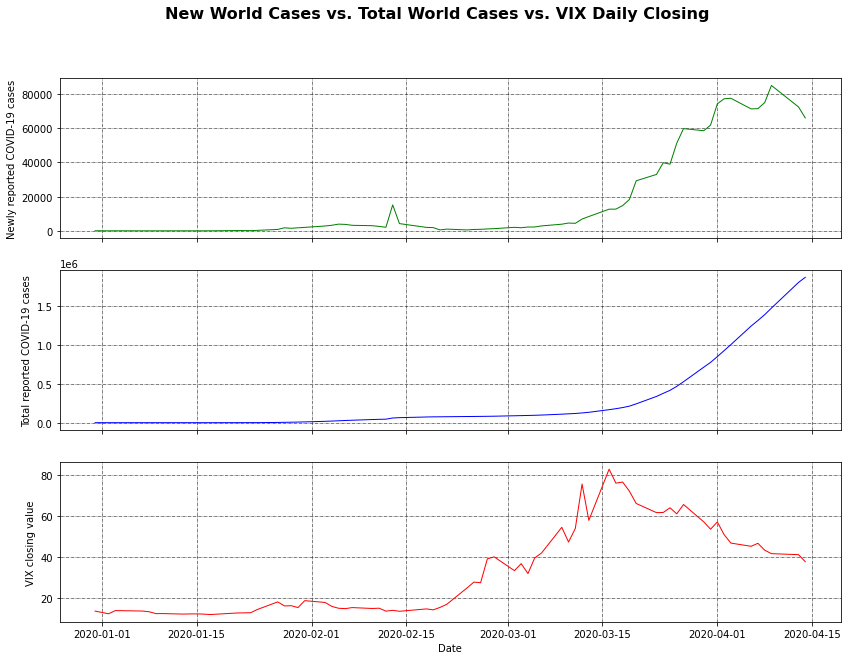

In [59]:
# merged_df['Date']=pd.to_datetime (merged_df['Date'])
# merged_df.set_index('Date')

figa, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
figa.suptitle("New World Cases vs. Total World Cases vs. VIX Daily Closing", fontsize=16, fontweight="bold")

ax1.plot(merged_df['New Cases'], linewidth=1, color = "g")
ax1.set_ylabel("Newly reported COVID-19 cases")

ax2.plot(merged_df['Total Cases'], linewidth=1, color = "b")
ax2.set_ylabel("Total reported COVID-19 cases")

ax3.plot(merged_df['VIX Close'], linewidth=1, color="r")
ax3.set_ylabel("VIX closing value")

figa.set_figheight(10)
figa.set_figwidth(14)

ax3.set_xlabel("Date")

# plt.xticks(rotation='vertical')

ax1.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
ax2.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
ax3.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

plt.show()

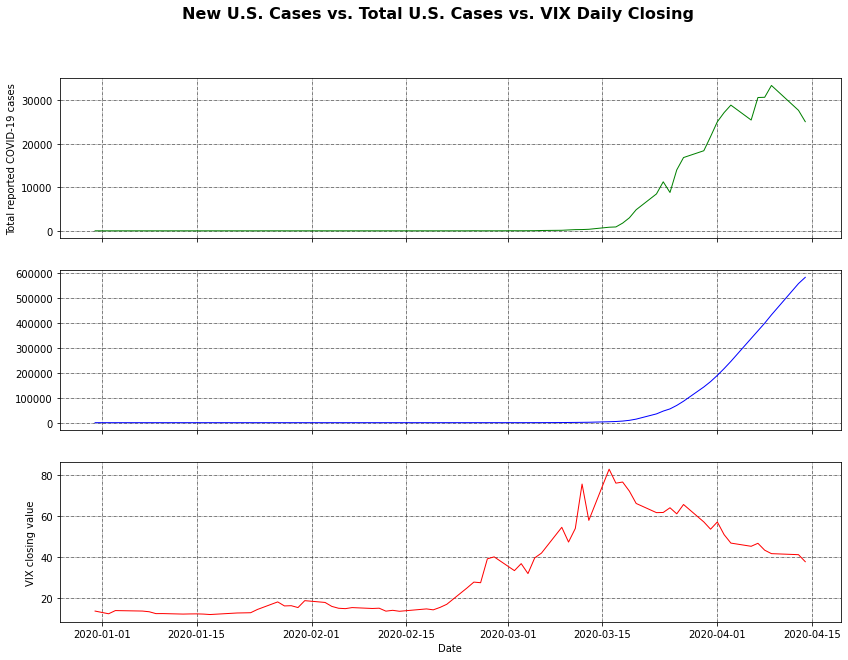

In [60]:
figb, (axu1, axu2, axu3) = plt.subplots(3, sharex=True)
figb.suptitle("New U.S. Cases vs. Total U.S. Cases vs. VIX Daily Closing", fontsize=16, fontweight="bold")

axu1.plot(merged_us_df['New Cases'], linewidth=1, color="g")
axu1.set_ylabel("Newly reported COVID-19 cases")

axu2.plot(merged_us_df['Total Cases'], linewidth=1, color="b")
axu1.set_ylabel("Total reported COVID-19 cases")

axu3.plot(merged_us_df['VIX Close'], linewidth=1, color="r")
axu3.set_ylabel("VIX closing value")

figb.set_figheight(10)
figb.set_figwidth(14)

axu3.set_xlabel("Date")

axu1.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
axu2.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
axu3.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

plt.show()

In [63]:
company_data.drop(columns=['AAPL','IBM','PFE'], inplace=True)
company_data.columns=['Date','AAL','AMZN','ANTM','WMT']
company_data['Date']=pd.to_datetime(company_data['Date'])
company_data.set_index('Date', inplace=True)
merged_comp_df = pd.merge(merged_us_df, company_data, on='Date', left_index=True)


In [64]:
merged_comp_df.drop(columns=['VIX Open','VIX High','VIX Low'], inplace=True)
merged_comp_df

,New Cases,New Deaths,Total Cases,Total Deaths,VIX Close,AAL,AMZN,ANTM,WMT
Date,,,,,,,,,
2019-12-31,0,0,0,0,13.78,28.680,1847.84,302.03,118.84
2020-01-02,0,0,0,0,12.47,29.090,1898.01,300.87,118.94
2020-01-03,0,0,0,0,14.02,27.650,1874.97,296.88,117.89
2020-01-06,0,0,0,0,13.85,27.320,1902.88,300.45,117.65
2020-01-07,0,0,0,0,13.79,27.220,1906.86,299.54,116.56
...,...,...,...,...,...,...,...,...,...
2020-04-07,30561,1342,368196,10989,46.70,10.220,2011.60,224.05,121.99
2020-04-08,30613,1906,398809,12895,43.35,11.330,2043.00,247.02,121.84
2020-04-09,33323,1922,432132,14817,41.67,12.510,2042.76,242.46,121.80


In [65]:
global_data = pd.merge(nasdaq_data, dowj_data, on='Date', left_index=True)
global_data = pd.merge(global_data, sandp_data, on='Date', left_index=True)
global_data['Date']=pd.to_datetime(global_data['Date'])
global_data.set_index('Date', inplace=True)
global_data.columns=['NASDAQ','Dow','S&P']
global_data


,NASDAQ,Dow,S&P
Date,,,
2020-04-08,8090.90,23433.57,2749.98
2020-04-07,7887.26,22653.86,2659.41
2020-04-06,7913.24,22679.99,2663.68
2020-04-03,7373.08,21052.53,2488.65
2020-04-02,7487.31,21413.44,2526.90
...,...,...,...
2020-01-08,9129.24,28745.09,3253.05
2020-01-07,9068.58,28583.68,3237.18
2020-01-06,9071.47,28703.38,3246.28


In [66]:
global_merged = pd.merge(merged_df, global_data, on='Date', left_index=True)
global_merged.drop(columns=['VIX Open','VIX High','VIX Low'], inplace=True)
global_merged

,New Cases,New Deaths,Total Cases,Total Deaths,VIX Close,NASDAQ,Dow,S&P
Date,,,,,,,,
2020-01-02,0,0,27,0,12.47,9092.19,28868.80,3257.85
2020-01-03,17,0,44,0,14.02,9020.77,28634.88,3234.85
2020-01-06,0,0,59,0,13.85,9071.47,28703.38,3246.28
2020-01-07,0,0,59,0,13.79,9068.58,28583.68,3237.18
2020-01-08,0,0,59,0,13.45,9129.24,28745.09,3253.05
...,...,...,...,...,...,...,...,...
2020-04-02,77149,4995,928490,46884,50.91,7487.31,21413.44,2526.90
2020-04-03,77447,4688,1005937,51572,46.80,7373.08,21052.53,2488.65
2020-04-06,71232,4655,1245596,68928,45.24,7913.24,22679.99,2663.68


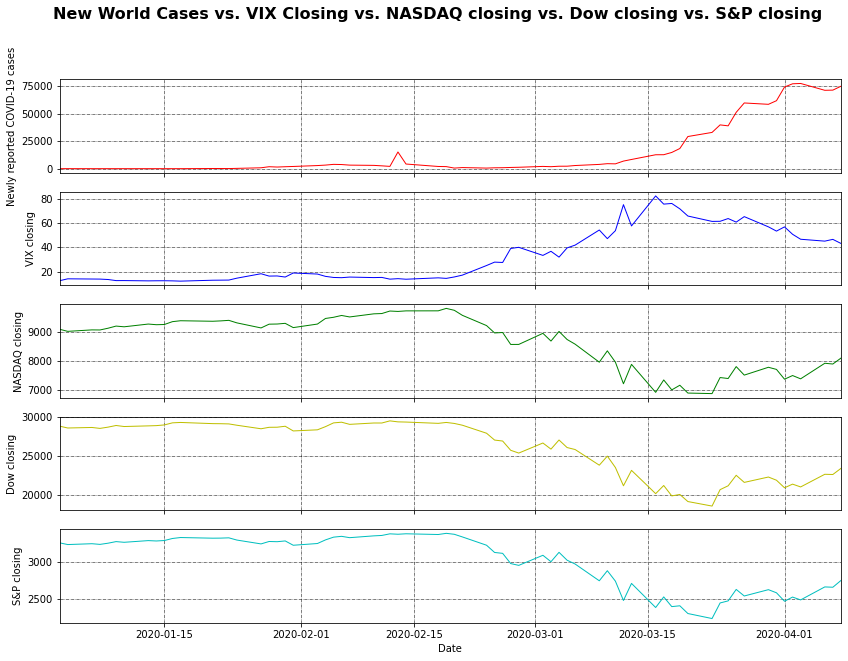

In [67]:
figc, (axc1, axc2, axc3, axc4, axc5) = plt.subplots(5, sharex=True)
figc.suptitle("New World Cases vs. VIX Closing vs. NASDAQ closing vs. Dow closing vs. S&P closing", fontsize=16, fontweight="bold")

axc1.plot(global_merged['New Cases'], linewidth=1, color = "r")
axc1.set_ylabel("Newly reported COVID-19 cases")
axc1.set_xlim([dt.date(2020, 1, 2), dt.date(2020, 4, 8)])

axc2.plot(global_merged['VIX Close'], linewidth=1, color = "b")
axc2.set_ylabel("VIX closing")

axc3.plot(global_merged['NASDAQ'], linewidth=1, color="g")
axc3.set_ylabel("NASDAQ closing")

axc4.plot(global_merged['Dow'], linewidth=1, color="y")
axc4.set_ylabel("Dow closing")

axc5.plot(global_merged['S&P'], linewidth=1, color="c")
axc5.set_ylabel("S&P closing")


figc.set_figheight(10)
figc.set_figwidth(14)

axc5.set_xlabel("Date")

# plt.xticks(rotation='vertical')

axc1.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
axc2.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
axc3.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
axc4.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
axc5.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

plt.show()

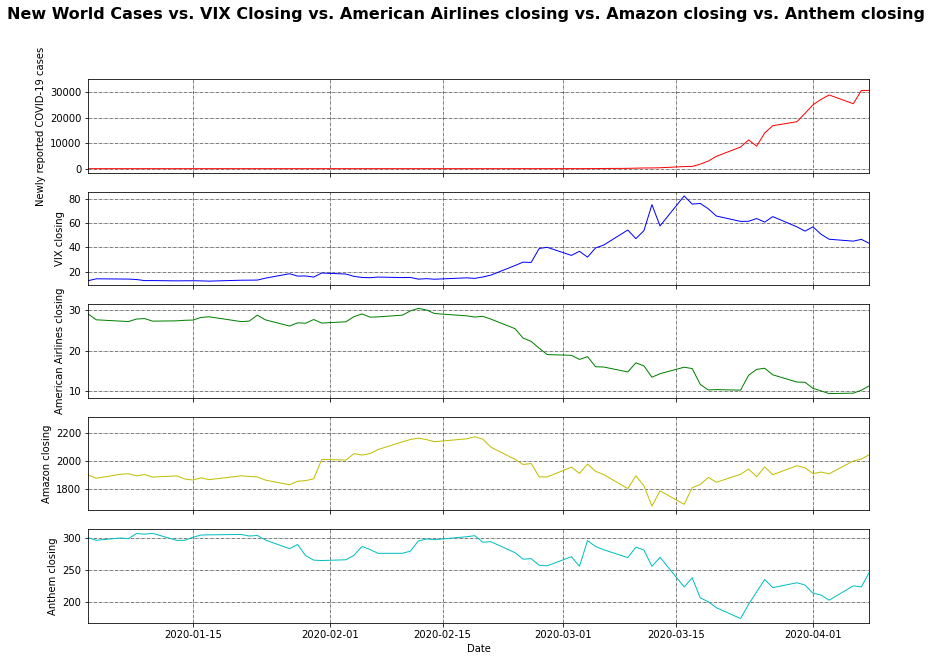

In [68]:
figd, (axd1, axd2, axd3, axd4, axd5) = plt.subplots(5, sharex=True)
figd.suptitle("New World Cases vs. VIX Closing vs. American Airlines closing vs. Amazon closing vs. Anthem closing", fontsize=16, fontweight="bold")

axd1.plot(merged_comp_df['New Cases'], linewidth=1, color = "r")
axd1.set_ylabel("Newly reported COVID-19 cases")
axd1.set_xlim([dt.date(2020, 1, 2), dt.date(2020, 4, 8)])

axd2.plot(merged_comp_df['VIX Close'], linewidth=1, color = "b")
axd2.set_ylabel("VIX closing")

axd3.plot(merged_comp_df['AAL'], linewidth=1, color="g")
axd3.set_ylabel("American Airlines closing")

axd4.plot(merged_comp_df['AMZN'], linewidth=1, color="y")
axd4.set_ylabel("Amazon closing")

axd5.plot(merged_comp_df['ANTM'], linewidth=1, color="c")
axd5.set_ylabel("Anthem closing")


figd.set_figheight(10)
figd.set_figwidth(14)

axd5.set_xlabel("Date")

# plt.xticks(rotation='vertical')

axd1.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
axd2.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
axd3.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
axd4.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
axd5.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

plt.show()

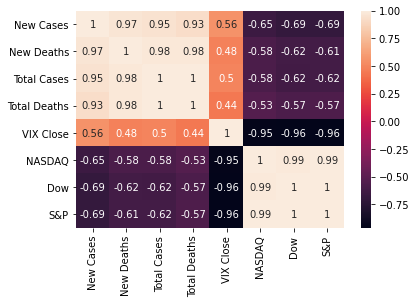

In [69]:
global_corr = global_merged.corr()
sn.heatmap(global_corr, annot=True)
plt.show()

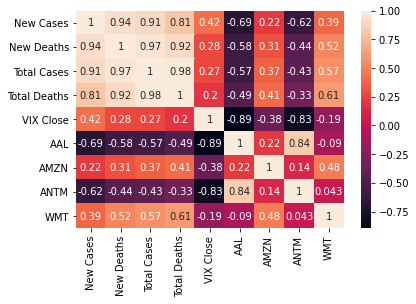

In [70]:
comp_corr = merged_comp_df.corr()
sn.heatmap(comp_corr, annot=True)
plt.show()

In [86]:
gmax = global_merged['VIX Close'].max()
gmaxdate = global_merged.index[global_merged['VIX Close'] == 82.69].tolist()
gmin = global_merged['VIX Close'].min()
gmindate = global_merged.index[global_merged['VIX Close'] == 12.1].tolist()
gmed = global_merged['VIX Close'].median()
gmean = global_merged['VIX Close'].mean()
print(f"VIX Closing max is: {gmax} on {gmaxdate}\nVIX Closing min is: {gmin} on {gmindate}\nVIX Closing median is: {gmed}\nVIX Closing mean is: {gmean}")


VIX Closing max is: 82.69 on [Timestamp('2020-03-16 00:00:00')]
VIX Closing min is: 12.1 on [Timestamp('2020-01-17 00:00:00')]
VIX Closing median is: 18.535
VIX Closing mean is: 32.734999999999985


In [75]:
gmax = global_merged['NASDAQ'].max()
gmaxdate = global_merged.index[global_merged['NASDAQ'] == 9817.18].tolist()
gmin = global_merged['NASDAQ'].min()
gmindate = global_merged.index[global_merged['NASDAQ'] == 6860.67].tolist()
gmed = global_merged['NASDAQ'].median()
gmean = global_merged['NASDAQ'].mean()
print(f"NASDAQ Closing max is: {gmax} on {gmaxdate}\nNASDAQ Closing min is: {gmin} on {gmindate}\nNASDAQ Closing median is: {gmed}\nNASDAQ Closing mean is: {gmean}")


NASDAQ Closing max is: 9817.18 on [Timestamp('2020-02-19 00:00:00')]
NASDAQ Closing min is: 6860.67 on [Timestamp('2020-03-23 00:00:00')]
NASDAQ Closing median is: 9070.025
NASDAQ Closing mean is: 8675.876470588235


In [77]:
gmax = global_merged['Dow'].max()
gmaxdate = global_merged.index[global_merged['Dow'] == 29551.42].tolist()
gmin = global_merged['Dow'].min()
gmindate = global_merged.index[global_merged['Dow'] == 18591.93].tolist()
gmed = global_merged['Dow'].median()
gmean = global_merged['Dow'].mean()
print(f"Dow Closing max is: {gmax} on {gmaxdate}\nDow Closing min is: {gmin} on {gmindate}\nDow Closing median is: {gmed}\nDow Closing mean is: {gmean}")


Dow Closing max is: 29551.42 on [Timestamp('2020-02-12 00:00:00')]
Dow Closing min is: 18591.93 on [Timestamp('2020-03-23 00:00:00')]
Dow Closing median is: 28327.92
Dow Closing mean is: 26155.21970588235


In [79]:
gmax = global_merged['S&P'].max()
gmaxdate = global_merged.index[global_merged['S&P'] == gmax].tolist()
gmin = global_merged['S&P'].min()
gmindate = global_merged.index[global_merged['S&P'] == gmin].tolist()
gmed = global_merged['S&P'].median()
gmean = global_merged['S&P'].mean()
print(f"S&P Closing max is: {gmax} on {gmaxdate}\nS&P Closing min is: {gmin} on {gmindate}\nS&P Closing median is: {gmed}\nS&P Closing mean is: {gmean}")


S&P Closing max is: 3386.15 on [Timestamp('2020-02-19 00:00:00')]
S&P Closing min is: 2237.4 on [Timestamp('2020-03-23 00:00:00')]
S&P Closing median is: 3230.37
S&P Closing mean is: 3015.0442647058826


In [81]:
gmax = merged_comp_df['AAL'].max()
gmaxdate = merged_comp_df.index[merged_comp_df['AAL'] == gmax].tolist()
gmin = merged_comp_df['AAL'].min()
gmindate = merged_comp_df.index[merged_comp_df['AAL'] == gmin].tolist()
gmed = merged_comp_df['AAL'].median()
gmean = merged_comp_df['AAL'].mean()
print(f"AAL Closing max is: {gmax} on {gmaxdate}\nAAL Closing min is: {gmin} on {gmindate}\nAAL Closing median is: {gmed}\nAAL Closing mean is: {gmean}")


AAL Closing max is: 30.47 on [Timestamp('2020-02-12 00:00:00')]
AAL Closing min is: 9.39 on [Timestamp('2020-04-03 00:00:00')]
AAL Closing median is: 25.78
AAL Closing mean is: 21.372986111111107


In [82]:
gmax = merged_comp_df['WMT'].max()
gmaxdate = merged_comp_df.index[merged_comp_df['WMT'] == gmax].tolist()
gmin = merged_comp_df['WMT'].min()
gmindate = merged_comp_df.index[merged_comp_df['WMT'] == gmin].tolist()
gmed = merged_comp_df['WMT'].median()
gmean = merged_comp_df['WMT'].mean()
print(f"WMT Closing max is: {gmax} on {gmaxdate}\nWMT Closing min is: {gmin} on {gmindate}\nWMT Closing median is: {gmed}\nWMT Closing mean is: {gmean}")


WMT Closing max is: 129.0 on [Timestamp('2020-04-14 00:00:00')]
WMT Closing min is: 104.05 on [Timestamp('2020-03-12 00:00:00')]
WMT Closing median is: 116.13
WMT Closing mean is: 116.27513888888886
